In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import japanize_matplotlib
from scipy import stats
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh')

plt.rcParams['figure.figsize'] = 10, 8

ModuleNotFoundError: No module named 'distutils'

In [ ]:
import pandas as pd
df = pd.read_csv('exercise.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   recency        64000 non-null  int64  
 1   history        64000 non-null  float64
 2   used_discount  64000 non-null  int64  
 3   used_bogo      64000 non-null  int64  
 4   zip_code       64000 non-null  object 
 5   is_referral    64000 non-null  int64  
 6   channel        64000 non-null  object 
 7   offer          64000 non-null  object 
 8   conversion     64000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 4.4+ MB


In [ ]:
df.describe()

,recency,history,used_discount,used_bogo,is_referral,conversion
count,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000
mean,5.763734,242.085656,0.551031,0.549719,0.502250,0.146781
std,3.507592,256.158608,0.497393,0.497526,0.499999,0.353890
min,1.000000,29.990000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,64.660000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,158.110000,1.000000,1.000000,1.000000,0.000000
75%,9.000000,325.657500,1.000000,1.000000,1.000000,0.000000
max,12.000000,3345.930000,1.000000,1.000000,1.000000,1.000000


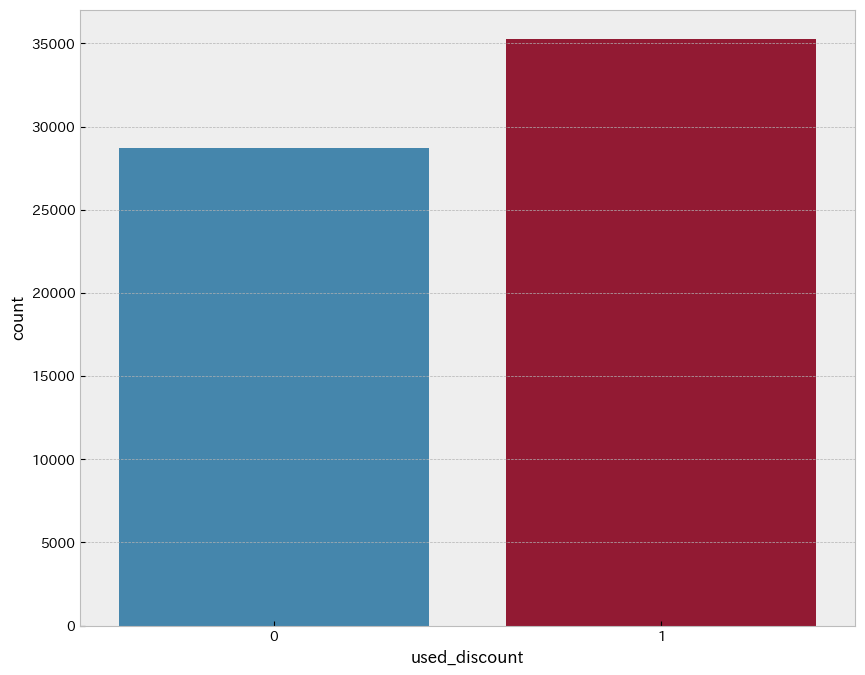

In [ ]:
sns.countplot(x='used_discount',data=df);

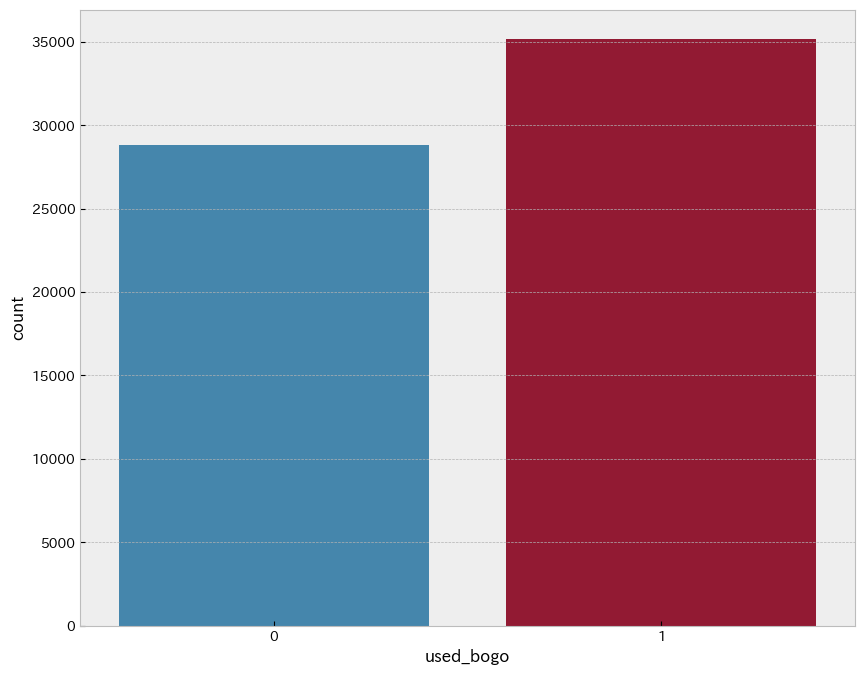

In [ ]:
sns.countplot(x='used_bogo',data=df);

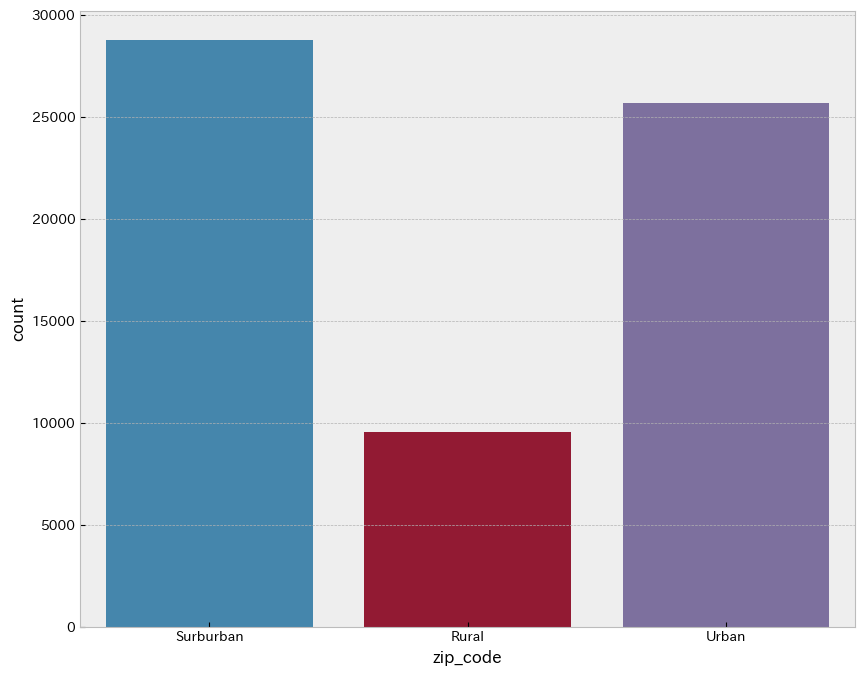

In [ ]:
sns.countplot(x='zip_code',data=df);

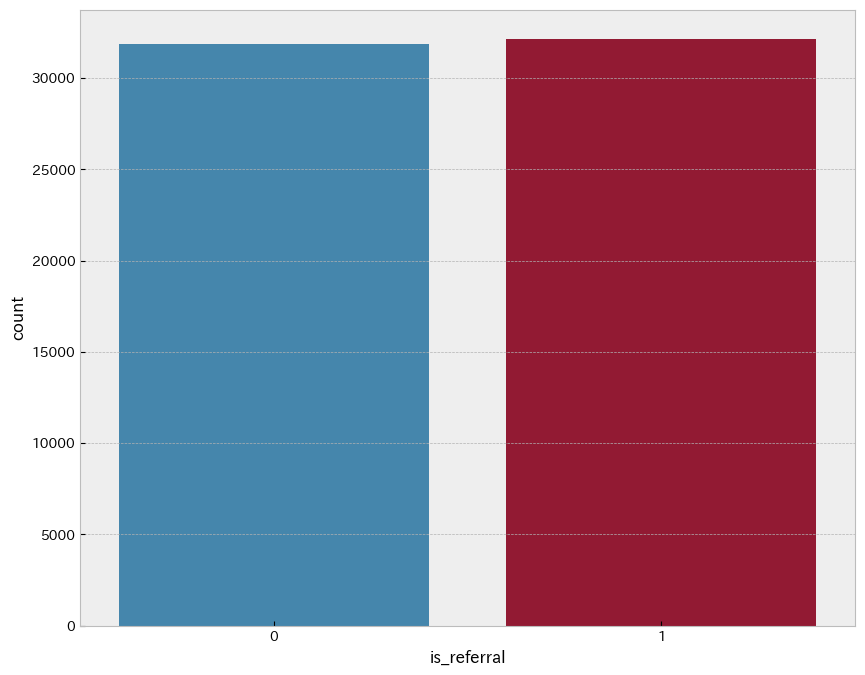

In [ ]:
sns.countplot(x='is_referral',data=df);

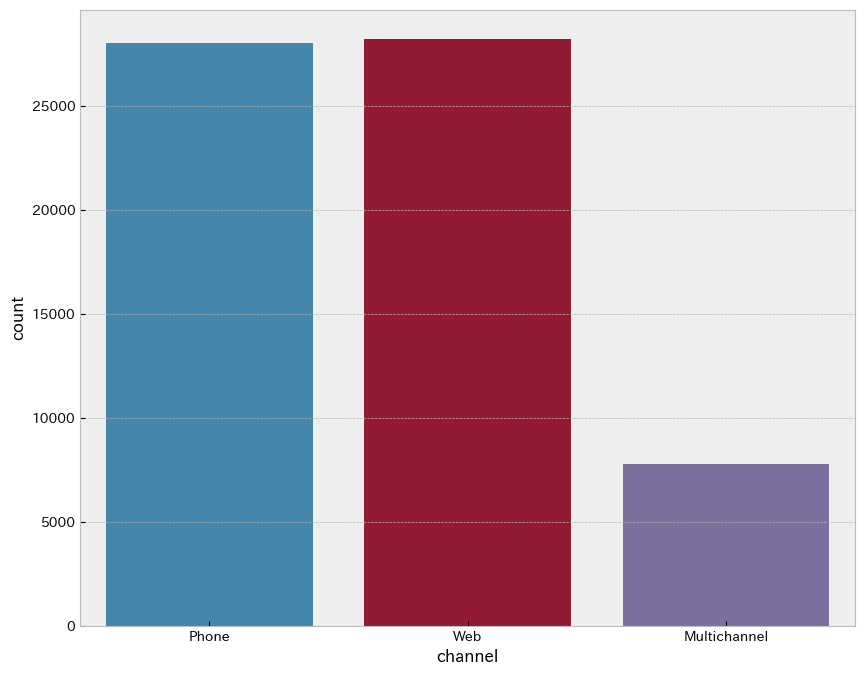

In [ ]:
sns.countplot(x='channel',data=df);

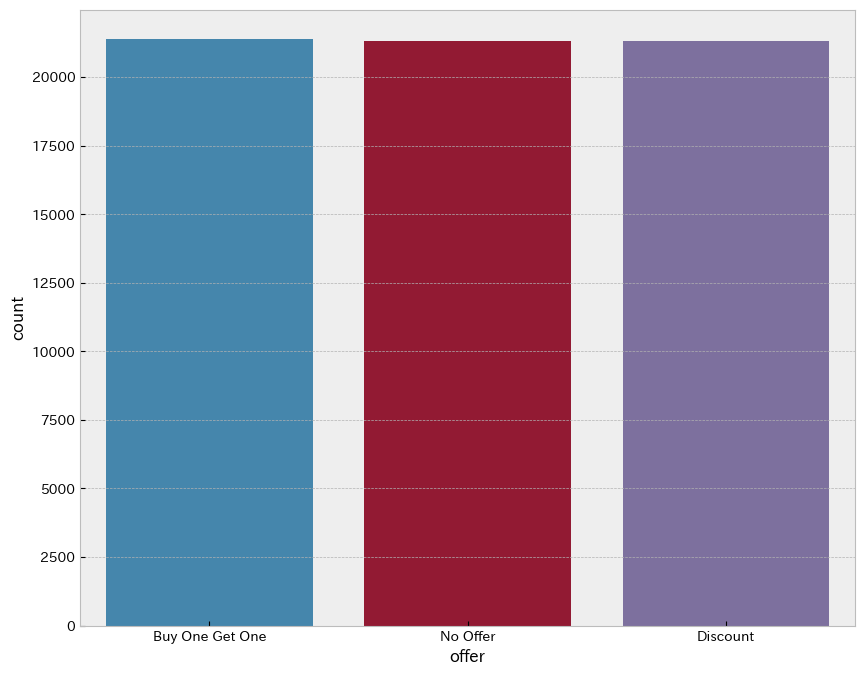

In [ ]:
sns.countplot(x='offer',data=df);

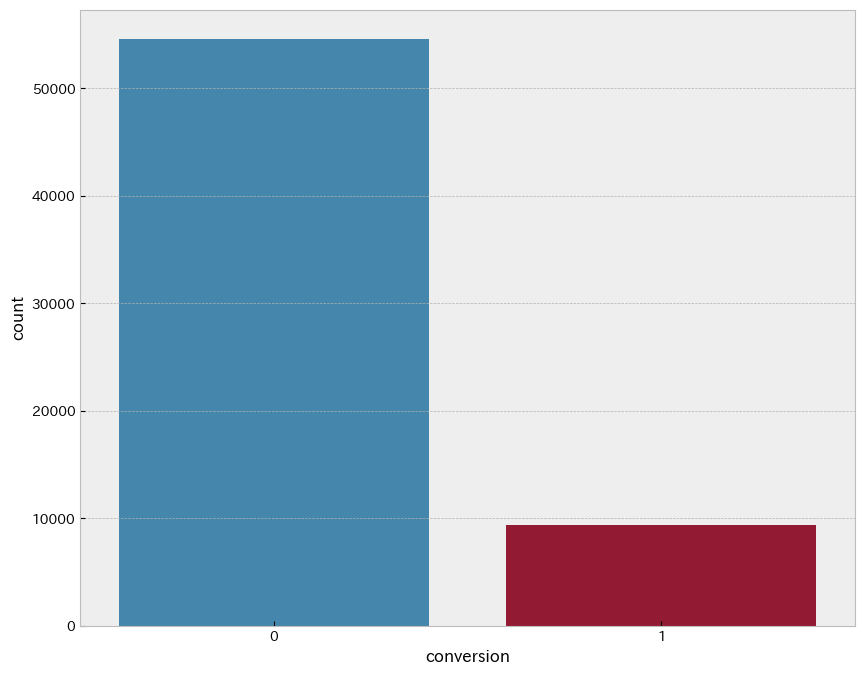

In [ ]:
sns.countplot(x='conversion',data=df);

In [ ]:
crosstab = pd.crosstab(df['conversion'],df['used_discount'])
crosstab

used_discount,0,1
conversion,,
0,24592,30014
1,4142,5252


In [ ]:
chi2,p,dof,ef = stats.chi2_contingency(crosstab,correction=False)

In [ ]:
p

0.08950487803670254

In [ ]:
crosstab = pd.crosstab(df['conversion'],df['used_bogo'])
crosstab

used_bogo,0,1
conversion,,
0,25174,29432
1,3644,5750


In [ ]:
chi2,p,dof,ef = stats.chi2_contingency(crosstab,correction=False)

In [ ]:
p

1.595298975970467e-39

In [ ]:
crosstab = pd.crosstab(df['conversion'],df['zip_code'])
crosstab

zip_code,Rural,Surburban,Urban
conversion,,,
0,7764,24749,22093
1,1799,4027,3568


In [ ]:
chi2,p,dof,ef = stats.chi2_contingency(crosstab,correction=False)

In [ ]:
p

4.636935563366961e-34

In [ ]:
crosstab = pd.crosstab(df['conversion'],df['is_referral'])
crosstab

is_referral,0,1
conversion,,
0,26343,28263
1,5513,3881


In [ ]:
chi2,p,dof,ef = stats.chi2_contingency(crosstab,correction=False)

In [ ]:
p

4.817988877193599e-78

In [ ]:
crosstab = pd.crosstab(df['conversion'],df['channel'])
crosstab

channel,Multichannel,Phone,Web
conversion,,,
0,6429,24458,23719
1,1333,3563,4498


In [ ]:
chi2,p,dof,ef = stats.chi2_contingency(crosstab,correction=False)

In [ ]:
p

1.2736921440078863e-35

In [ ]:
#全体のクロス集計
crosstab = pd.crosstab(df['conversion'],df['offer'])
crosstab

offer,Buy One Get One,Discount,No Offer
conversion,,,
0,18149,17413,19044
1,3238,3894,2262


In [ ]:
df_ = df[df['is_referral']==0]
df_.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0
5,6,134.83,0,1,Surburban,0,Phone,Buy One Get One,1
7,9,46.42,0,1,Urban,0,Phone,Buy One Get One,0
13,2,101.64,0,1,Urban,0,Web,Discount,1


In [ ]:
#is_referralが0の人だけの分
crosstab = pd.crosstab(df_['conversion'],df_['offer'])
crosstab

offer,Buy One Get One,Discount,No Offer
conversion,,,
0,8777,8374,9192
1,1847,2247,1419


In [ ]:
chi2,p,dof,ef = stats.chi2_contingency(crosstab,correction=False)

In [ ]:
p

1.5623587181654156e-49

In [ ]:
crosstab = pd.crosstab(df['conversion'],[df['zip_code'],df['is_referral']])
crosstab

zip_code    Rural       Surburban         Urban       
is_referral     0     1         0      1      0      1
conversion                                            
0            3785  3979     11934  12815  10624  11469
1            1029   770      2357   1670   2127   1441

In [ ]:
chi2,p,dof,ef = stats.chi2_contingency(crosstab,correction=False)

In [ ]:
p

3.08369731826634e-106

In [ ]:
crosstab = pd.crosstab(df['conversion'],[df['zip_code'],df['is_referral']])
crosstab

zip_code    Rural       Surburban         Urban       
is_referral     0     1         0      1      0      1
conversion                                            
0            3785  3979     11934  12815  10624  11469
1            1029   770      2357   1670   2127   1441

In [ ]:
chi2,p,dof,ef = stats.chi2_contingency(crosstab,correction=False)

In [ ]:
p

3.08369731826634e-106

In [ ]:
crosstab = pd.crosstab(df['conversion'],[df['zip_code'],df['used_bogo']])
crosstab

zip_code   Rural       Surburban         Urban       
used_bogo      0     1         0      1      0      1
conversion                                           
0           3602  4162     11412  13337  10160  11933
1            725  1074      1534   2493   1385   2183

In [ ]:
chi2,p,dof,ef = stats.chi2_contingency(crosstab,correction=False)

In [ ]:
p

1.12267479502606e-68

In [ ]:
crosstab = pd.crosstab(df['conversion'],[df['is_referral'],df['used_bogo']])
crosstab

is_referral      0             1       
used_bogo        0      1      0      1
conversion                             
0            12401  13942  12773  15490
1             2283   3230   1361   2520

In [ ]:
chi2,p,dof,ef = stats.chi2_contingency(crosstab,correction=False)

In [ ]:
p

3.7945641775460015e-116

In [ ]:
crosstab = pd.crosstab(df['conversion'],[df['is_referral'],df['channel']])
crosstab

is_referral            0                          1              
channel     Multichannel  Phone    Web Multichannel  Phone    Web
conversion                                                       
0                   2537  12003  11803         3892  12455  11916
1                    601   2195   2717          732   1368   1781

In [ ]:
chi2,p,dof,ef = stats.chi2_contingency(crosstab,correction=False)

In [ ]:
p

4.20436714029537e-113

In [ ]:
crosstab = pd.crosstab(df['conversion'],[df['is_referral'],df['used_discount']])
crosstab

is_referral        0             1       
used_discount      0      1      0      1
conversion                               
0              12077  14266  12515  15748
1               2558   2955   1584   2297

In [ ]:
chi2,p,dof,ef = stats.chi2_contingency(crosstab,correction=False)

In [ ]:
p

1.0791903147323775e-78

In [ ]:
crosstab = pd.crosstab(df['conversion'],[df['is_referral'],df['offer']])
crosstab

is_referral               0                                 1           \
offer       Buy One Get One Discount No Offer Buy One Get One Discount   
conversion                                                               
0                      8777     8374     9192            9372     9039   
1                      1847     2247     1419            1391     1647   

is_referral           
offer       No Offer  
conversion            
0               9852  
1                843

In [ ]:
chi2,p,dof,ef = stats.chi2_contingency(crosstab,correction=False)

In [ ]:
p

3.335070607324179e-183

In [ ]:
df_ = df[df['is_referral']==0]
df_.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0
5,6,134.83,0,1,Surburban,0,Phone,Buy One Get One,1
7,9,46.42,0,1,Urban,0,Phone,Buy One Get One,0
13,2,101.64,0,1,Urban,0,Web,Discount,1


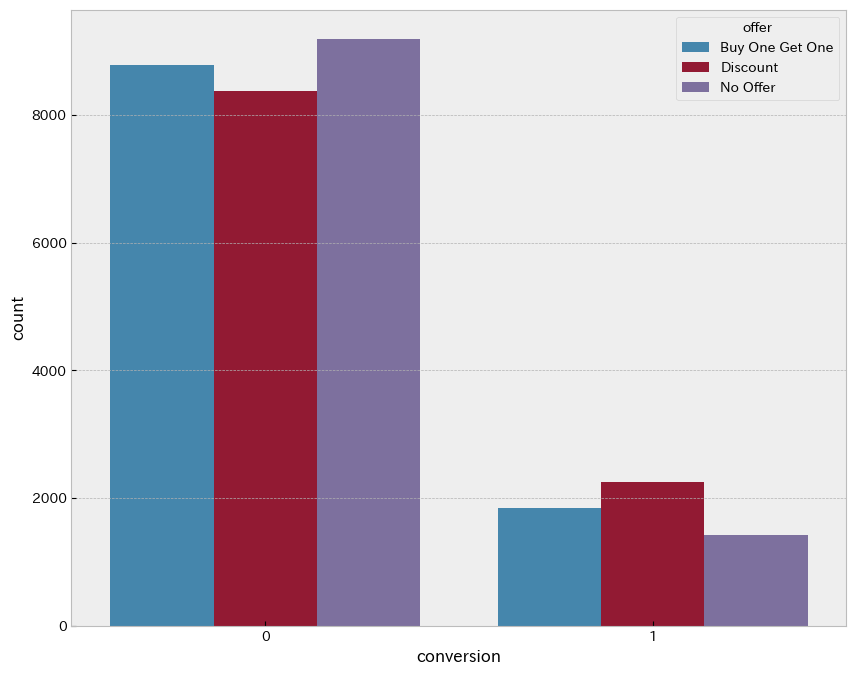

In [ ]:
#is_referralが0の人のヒストグラム
sns.countplot(x='conversion',hue='offer',data=df_);

In [ ]:
pd.crosstab(df_['offer'],df_['conversion'])

conversion,0,1
offer,,
Buy One Get One,8777,1847
Discount,8374,2247
No Offer,9192,1419


In [ ]:
chi2,p,dof,ef = stats.chi2_contingency(crosstab,correction=False)

In [ ]:
p

3.335070607324179e-183